**MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE**.

**Course: TC5044.10 - Machine learning operations**

Tecnológico de Monterrey

Professor 	
Dr. Gerardo Rodríguez Hernández

**Week 5**
Phase 1 | Project Progress

---
**Team 30**
*   Jorge Antonio Acosta Rosales - A01381552
*   Antonio Olvera Donlucas - A01795617
*   Fernando Jaime Sanchez - A01795383
*   Jorge Mariles Estrada - A01335663
*   Jose Luis Artigas Arroyo - A01794906

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Loading and exploring the data

In [2]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

def explore_data(data):
    print(data.head())
    print(data.describe())
    print(data.info())


# Visualizing the data

In [3]:
# Define a function to create histograms and boxplots for numerical columns
def plot_numerical_columns(df, numerical_columns):

    # Set the style for seaborn plots
    sns.set_style("whitegrid")
    # Calculating the number of rows needed for the subplots
    n_columns = 4
    n_rows = int(len(numerical_columns) * 2 / n_columns)
    
    if len(numerical_columns) * 2 % n_columns != 0:
        n_rows += 1

    # Create subplots
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(17, 3 * n_rows))

    for i, column in enumerate(numerical_columns):
        row = (i * 2) // n_columns
        col = (i * 2) % n_columns

        # Histogram
        sns.histplot(df[column], bins=30, ax=axs[row, col], kde=True)
        axs[row, col].set_title(f'Histogram of {column}')

        # Boxplot
        sns.boxplot(x=df[column], ax=axs[row, col + 1])
        axs[row, col + 1].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

In [4]:

def plot_correlation_matrix(data, numerical_columns):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.show()



# Preprocessing and feature engineering

In [5]:
def scale_features(data):
    # Define the preprocessing pipeline
    TARGET = "Machine failure"
    # Identifies numerical and categorical columns
    numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    categorical_columns = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
  

    # Define the transformer with MinMaxScaler for numerics and OneHotEncoder for categorics
    preprocessing = ColumnTransformer([
        ('minmax_scaler', StandardScaler(), numerical_columns),
        ('onehot', OneHotEncoder(drop='first'), categorical_columns)
    ], remainder='passthrough')  # 'passthrough' for unspecified columns in the transformer

    # apply the transformer to the training data
    features_scaled = preprocessing.fit_transform(data.drop([TARGET, 'Product ID', 'UDI'], axis=1))

    # To get the names of the new categorical columns after one-hot encoding
    # We need to adjust the OneHotEncoder to get the categories
    onehot_encoder = preprocessing.named_transformers_['onehot']
    categorical_columns_names = onehot_encoder.get_feature_names_out(categorical_columns)

    # Join the names of the numeric columns and the new categorical columns.
    new_column_names = numerical_columns + list(categorical_columns_names)

    # Converts the transformed data into a DataFrame for better visualization
    features_df_scaled = pd.DataFrame(features_scaled , columns=new_column_names)

    # Add the target column to the DataFrame
    features_df_scaled[TARGET] = data[TARGET]
    return features_df_scaled

# Splitting the dataset

In [6]:
def split_data(data, target, test_size=0.2, random_state=42):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Training the model

In [7]:
def train_model(X_train, y_train):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Evaluating the model

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

# Cross Validation

In [9]:
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print("Average Accuracy with CV:", np.mean(scores))

In [12]:
# Main function for running the pipeline
def main(filepath):
    data = load_data(filepath)
    numerical_columns = data.select_dtypes(include = ['int', 'float']).columns
    explore_data(data)
    plot_numerical_columns(data, numerical_columns)
    plot_correlation_matrix(data, numerical_columns)
    data_scaled = scale_features(data)
    X_train, X_test, y_train, y_test = split_data(data_scaled, 'Machine failure')
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    cross_validate_model(model, data_scaled.drop('Machine failure', axis=1), data_scaled['Machine failure'])

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

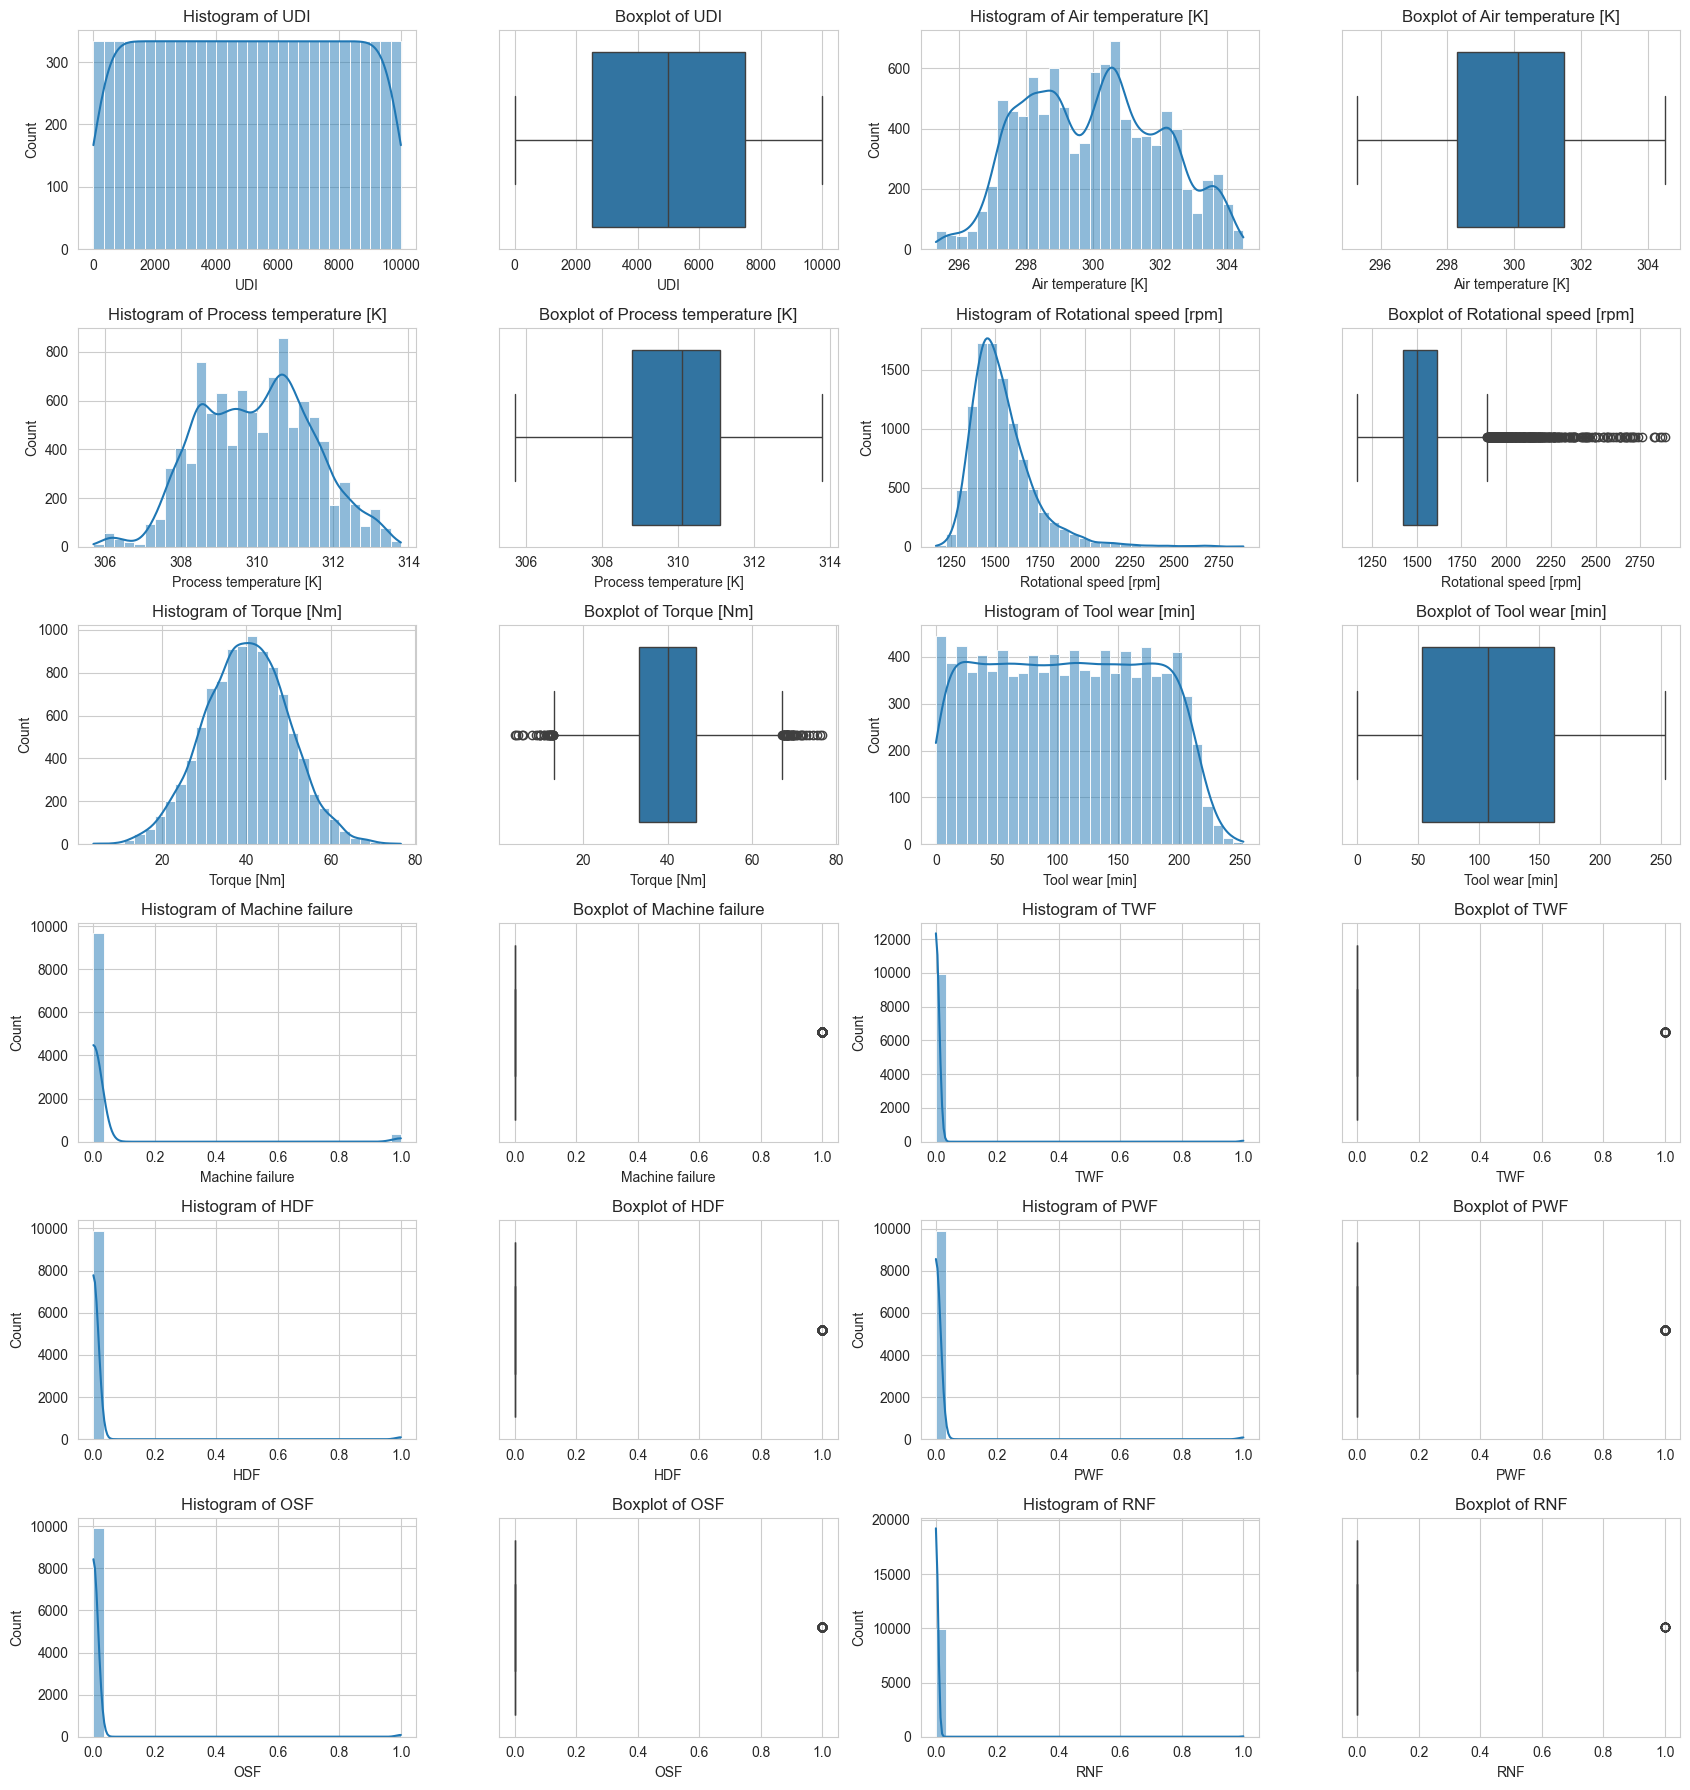

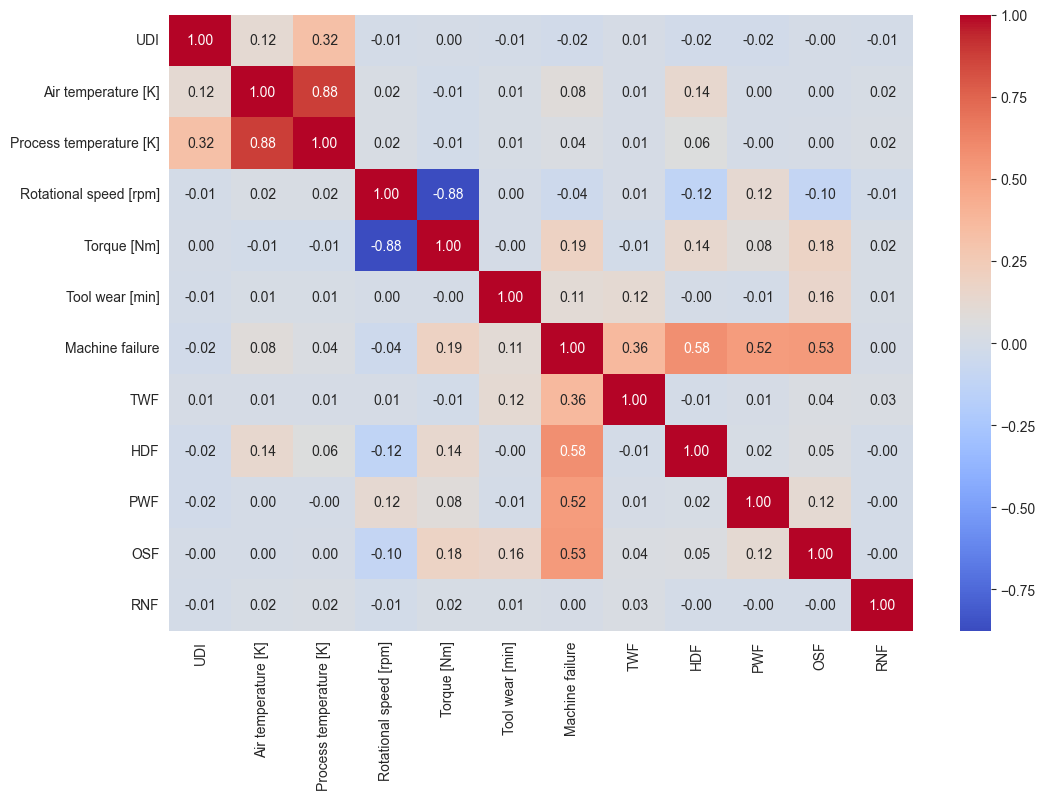

Confusion Matrix:


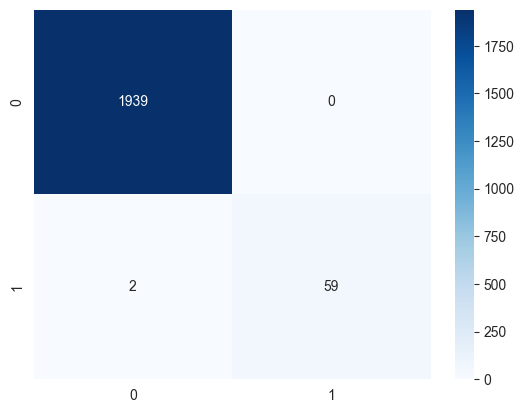

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Average Accuracy with CV: 0.9989000000000001


In [13]:
main(filepath='../data/raw/ai4i2020.csv')

it is noticeable that we have a dominant class so the model will tend to predict this class and its generalization capacity will be limited, it is recommended to better analyze the different characteristics of the data set and apply useful transformations to further normalize the data and avoid this overload. however, for practical purposes the exercise was left as it is to continue with the model management pipeline.